In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score



pd.set_option('display.precision', 15)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#функция для отображения гистограмм всех признаков для целевого поля
def feat_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new[group_col]==cl][c], 
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

# Загружаем данные

In [98]:
df = pd.read_csv('gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058193,13,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,2,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,2,3,1.113884400425780,1.120078107422207,0


In [99]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [100]:
df.shape

(4000, 14)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null int64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 437.6 KB


In [56]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.486750000000000,0.308500000000000,0.903500000000000,4.681250000000000,0.412250000000000,29.184249999999999,146.943727809250078,5.011500000000000,3.72475000000000,1.879019712534941,1.767051822040509,0.265250000000000
std,0.499957425044109,0.361711412989097,0.499886896434881,0.461931916275353,0.295312634995682,4.549705857893457,0.492301256987948,3.258367102790019,96.355602395679895,3.899572978847043,3.74926682004919,0.972244872030618,1.052905717489530,0.441521429596802
min,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,18.000000000000000,0.148204788456624,2.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,27.000000000000000,68.868829978416670,2.000000000000000,1.00000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,29.000000000000000,136.220158971036881,2.000000000000000,3.00000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,6.000000000000000,1.000000000000000,31.000000000000000,210.949624655502106,7.000000000000000,5.00000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,12.000000000000000,1.000000000000000,41.000000000000000,552.590740386879816,13.000000000000000,31.00000000000000,6.023668475995910,6.146782880452392,1.000000000000000


In [57]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611899,5.888397414086424,4.711806736985369,2.024875642518554,2.027881733095179
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287263,2.582469368520264,0.990574929311970,1.474994662372977,1.044545593398017


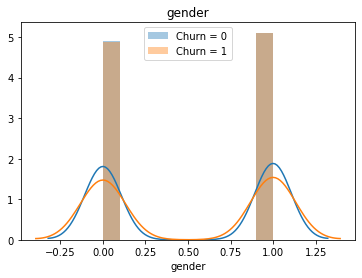

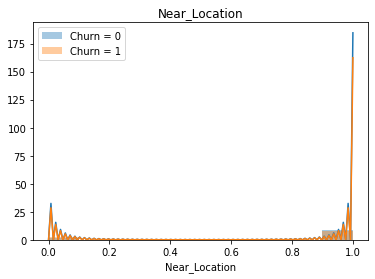

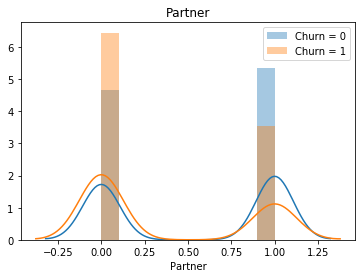

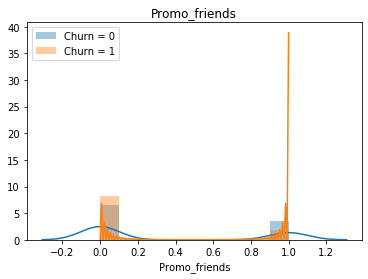

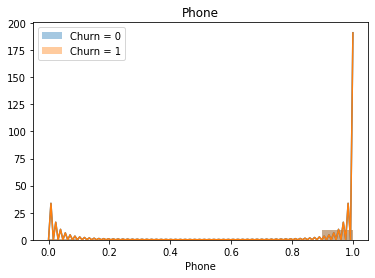

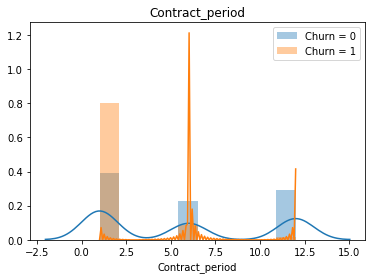

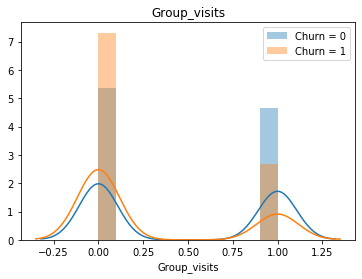

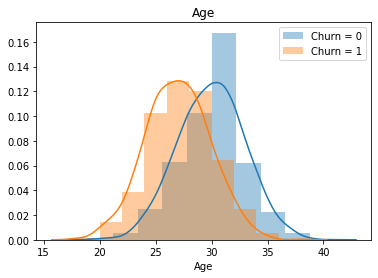

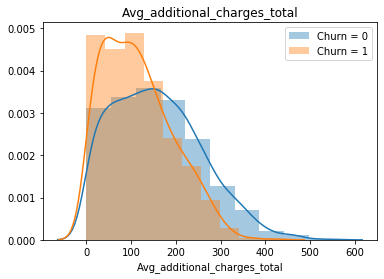

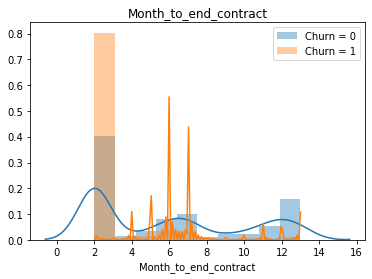

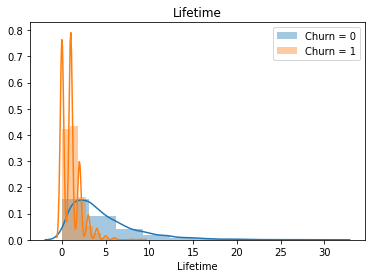

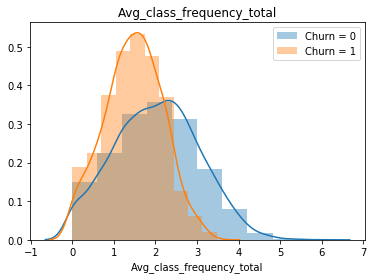

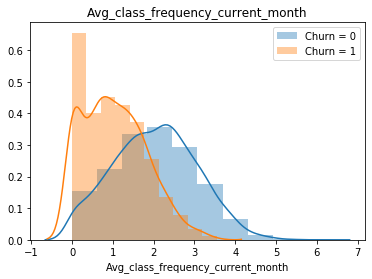

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


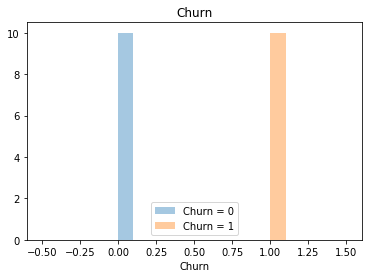

In [58]:
feat_hist(df, 'Churn', df.columns)

In [59]:
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000000000000,0.006699227595081,-0.010462622250800,-0.005033272441054,-0.008542118064000,0.000502261220279,0.017878940218984,0.013806900920359,-0.009334436022096,-0.000830048513911,0.013578571154469,0.014620159193697,0.009156488375539,0.000707733985154
Near_Location,0.006699227595081,1.000000000000000,-0.005119431260763,0.210964279250094,-0.015763230257229,0.150232831416562,0.154728047973810,0.058357839446367,0.040761205686104,0.140607151942196,0.070920564055167,0.043127478605892,0.062663633458793,-0.128097990299807
Partner,-0.010462622250800,-0.005119431260763,1.000000000000000,0.451959803638695,0.009969610205314,0.306166251238880,0.022709566916952,0.047479698759628,0.022941185300936,0.289093585487148,0.061229353260986,0.024937869800104,0.045561091362000,-0.157985736985099
Promo_friends,-0.005033272441054,0.210964279250094,0.451959803638695,1.000000000000000,0.001981592231934,0.244551568070660,0.120169506269847,0.050113307413902,0.036897676000240,0.234996575103960,0.072721100932984,0.028063220773726,0.053768377063077,-0.162233077833512
Phone,-0.008542118064000,-0.015763230257229,0.009969610205314,0.001981592231934,1.000000000000000,-0.006893264000345,-0.010099146860771,-0.011403238953259,0.009279431489794,-0.011196205122376,-0.018801227382776,0.008340465501806,0.013374852916165,-0.001176601362480
Contract_period,0.000502261220279,0.150232831416562,0.306166251238880,0.244551568070660,-0.006893264000345,1.000000000000000,0.169990834019098,0.138249289429530,0.111445063341487,0.959376464744038,0.170725270972966,0.096211136398088,0.159407376566585,-0.389984211586042
Group_visits,0.017878940218984,0.154728047973810,0.022709566916952,0.120169506269847,-0.010099146860771,0.169990834019098,1.000000000000000,0.080933568901736,0.032079086460015,0.159569405691151,0.075852846038238,0.056694752430919,0.075923274727096,-0.175324655498140
Age,0.013806900920359,0.058357839446367,0.047479698759628,0.050113307413902,-0.011403238953259,0.138249289429530,0.080933568901736,1.000000000000000,0.080240125272997,0.131100745291818,0.164692820019428,0.119953132113990,0.183094542154535,-0.404735252823579
Avg_additional_charges_total,-0.009334436022096,0.040761205686104,0.022941185300936,0.036897676000240,0.009279431489794,0.111445063341487,0.032079086460015,0.080240125272997,1.000000000000000,0.114617838454726,0.079028338696601,0.044426412947373,0.079569677409450,-0.198697451068200
Month_to_end_contract,-0.000830048513911,0.140607151942196,0.289093585487148,0.234996575103960,-0.011196205122376,0.959376464744038,0.159569405691151,0.131100745291818,0.114617838454726,1.000000000000000,0.157722761191034,0.080823207633718,0.142538659740206,-0.374307157409325


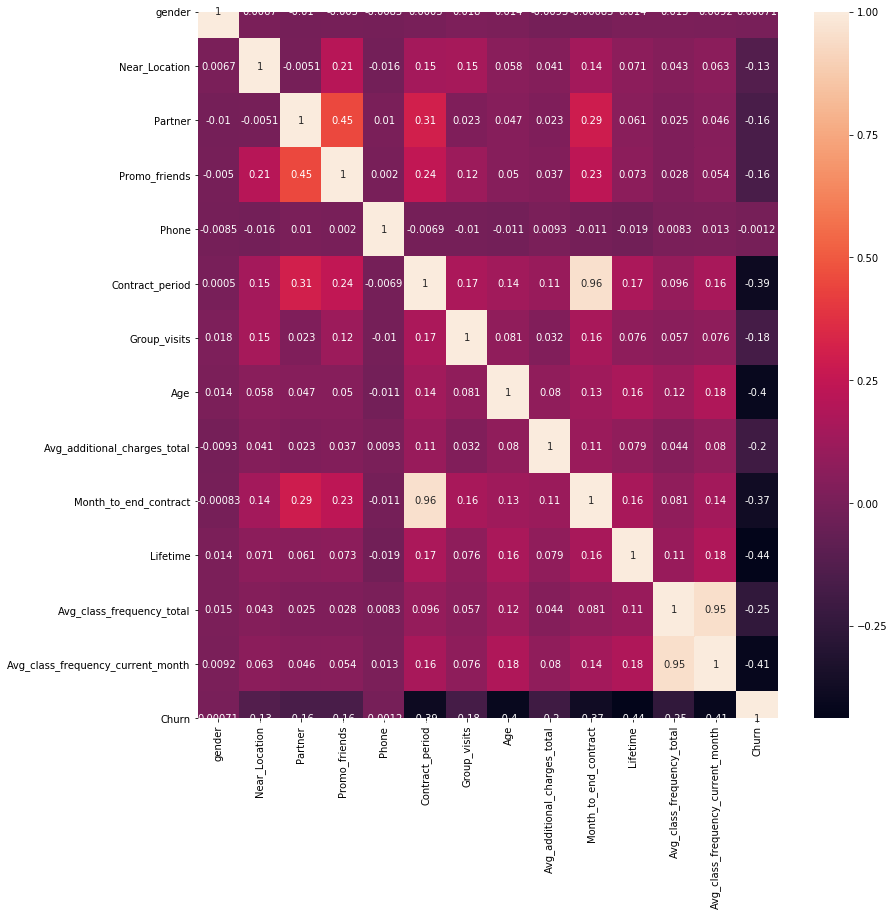

In [60]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Churn prediction

In [61]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(columns = ['Churn']), df['Churn'], test_size = 0.2)

Logistic Regression model:

In [62]:
lr_model = LogisticRegression()

In [63]:
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_proba_lr = lr_model.predict_proba(X_val)
y_pred_lr  = lr_model.predict(X_val)

In [65]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Precision score for logistic regression is: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('Recall score for logistic regression is: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

Accuracy score for logistic regression is: 0.92
Precision score for logistic regression is: 0.90
Recall score for logistic regression is: 0.78


Random forest model:

In [66]:
rf_model = RandomForestClassifier(n_estimators=100)

In [67]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
y_proba_rf = rf_model.predict_proba(X_val)
y_pred_rf = rf_model.predict(X_val)

In [69]:
print('Accuracy score for random forest is: {:.2f}'.format(accuracy_score(y_val, y_pred_rf)))
print('Precision score for random forest is: {:.2f}'.format(precision_score(y_val, y_pred_rf)))
print('Recall score for random forest is: {:.2f}'.format(recall_score(y_val, y_pred_rf)))

Accuracy score for random forest is: 0.92
Precision score for random forest is: 0.89
Recall score for random forest is: 0.77


Обе модели дают достаточно неплохие результаты. Доля правильных ответов у обеих моделей одинаковвая, а вот метрики точности и полноты немного лучше у логистической регрессии. Возможно, потому что случайгый лес слишком сильно переобучается. В любом случае для начала мы можем сделать выбор в пользу первой

## Clustering

In [85]:
sc = StandardScaler()
x_sc = sc.fit_transform(df.drop(columns = ['Churn']))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
linked = linkage(x_sc, method = 'ward')

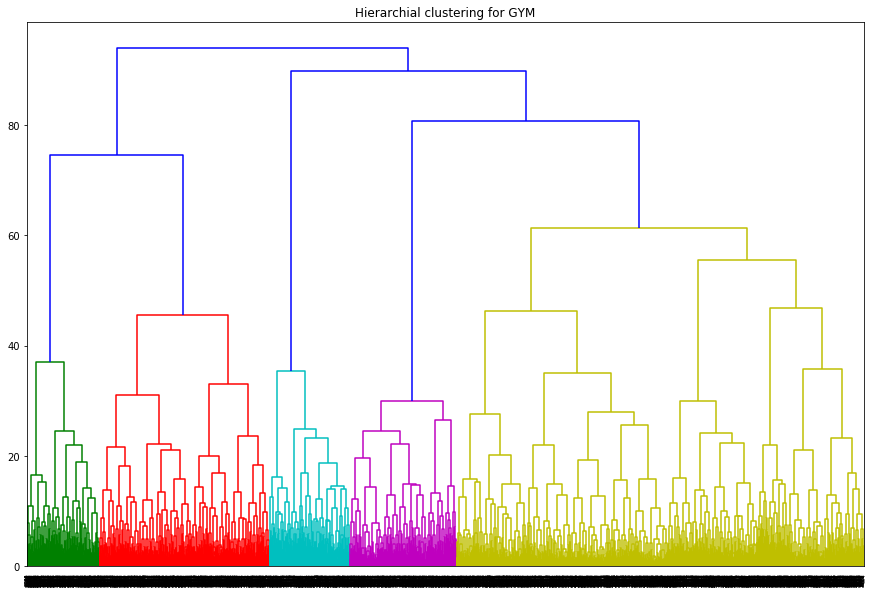

In [87]:
plt.figure(figsize=(15, 10))  
dendrogram(linked,
            orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

In [103]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df.drop(columns = ['Churn']))

In [104]:
df['cluster_km'] = labels

In [105]:
df.groupby(['cluster_km']).count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030
1,957,957,957,957,957,957,957,957,957,957,957,957,957,957
2,276,276,276,276,276,276,276,276,276,276,276,276,276,276
3,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029
4,708,708,708,708,708,708,708,708,708,708,708,708,708,708


In [106]:
df.groupby(['cluster_km']).sum()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,523,850,503,303,936,4320,400,29776,36598.521454158289998,4701,3484,1891.816289368199932,1743.012787265690804,361
1,487,808,477,309,864,4527,405,28144,167021.515307381050661,4831,3591,1808.980688307722403,1703.336324909848145,218
2,128,236,141,92,256,1599,119,8242,98122.776059547788464,1643,1230,558.421645060580772,556.062370634405852,13
3,531,864,465,287,923,4437,418,29810,108865.677725410321727,4857,3657,1907.710014592284779,1759.452177174259077,344
4,372,623,361,243,635,3842,307,20765,177166.420690502214711,4014,2937,1349.150212810962330,1306.343628177830396,125


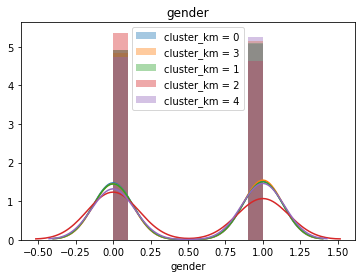

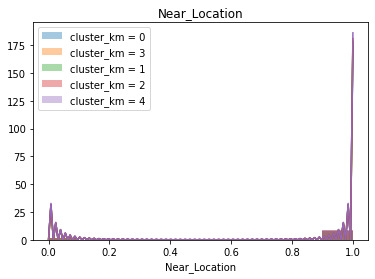

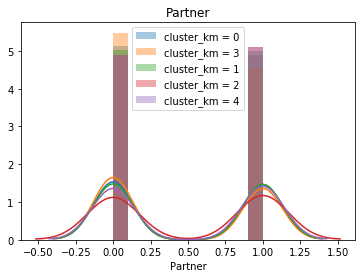

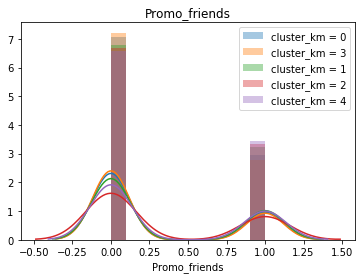

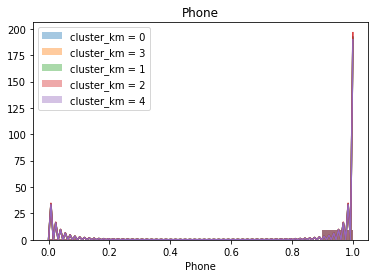

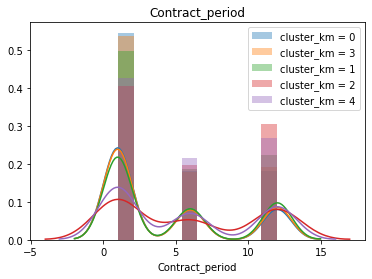

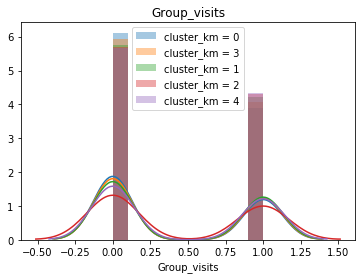

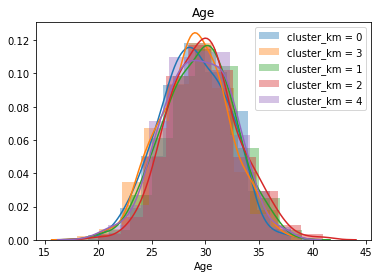

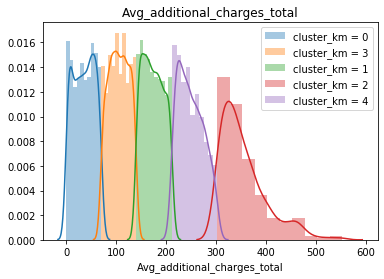

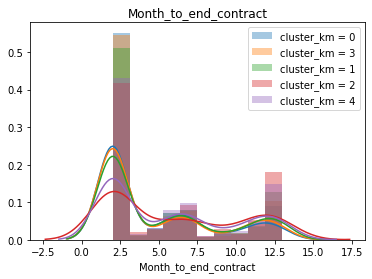

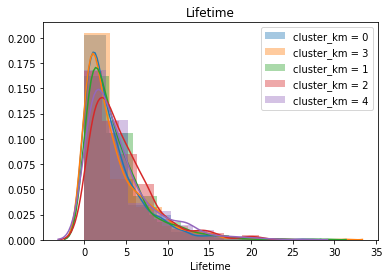

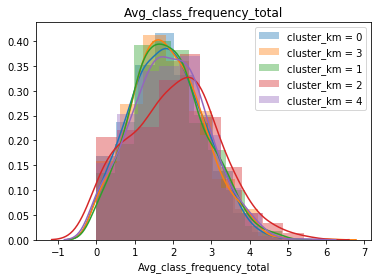

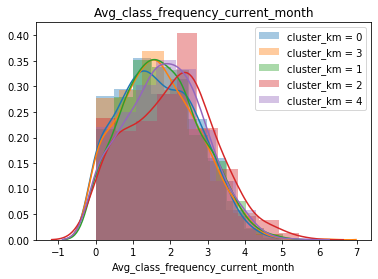

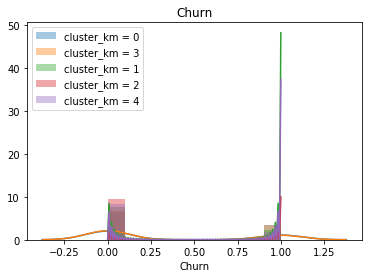

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


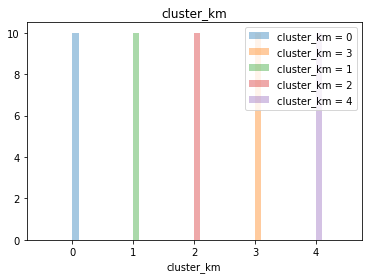

In [107]:
feat_hist(df, 'cluster_km', df.columns)

In [111]:
#посмотрим на долю оттока по кластерам
df.groupby(['cluster_km']).mean()['Churn']

cluster_km
0    0.350485436893204
1    0.227795193312435
2    0.047101449275362
3    0.334305150631681
4    0.176553672316384
Name: Churn, dtype: float64

Самый отточный кластер - "2". Самые"надежные" клиенты - из кластеров "0" и "4"